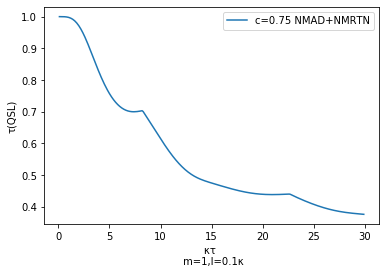

"\nplt.plot(k,revqsl[0,:], label='c=0.75 NMAD+NMRTN')\nplt.plot(k,revqsl[1,:], label='c=0.0.01 NMAD+MRTN')\nplt.xlabel('κτ \n m=1,l=0.1κ')\nplt.ylabel('1/τ(QSL)')\nplt.legend()\nplt.show()"

In [22]:
#time is fixed at t=1, l,k and m are changing 
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as scint
import cmath
import math

def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real

def g3(m,c,t):
    meu=cmath.sqrt((2*c/m)**2-1)
    g3=((m/meu)*(meu**2+1)*cmath.sin(meu*m*t))/(cmath.cos(meu*m*t)+cmath.sin(meu*m*t)/meu)
    return g3.real    

def tevolve(l,k,m,c,t,rho): #complex stuff here 
    d=cmath.sqrt(l**2-2*k*l)
    meu=cmath.sqrt((2*c/m)**2-1)
    rhot=np.zeros((2,2))
    xt=np.exp(-l*t)*(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))**2
    p1t=xt*rho[1,1]+1-xt
    rtnd=np.exp(-m*t)*(cmath.cos(meu*m*t)+cmath.sin(meu*m*t)/meu)
    coh=rho[0,1]*cmath.sqrt(xt)*rtnd
    rhot[0,0]=1-p1t.real
    rhot[1,1]=p1t.real
    rhot[0,1]=coh.real
    rhot[1,0]=coh.real
    return rhot

def lind(l,k,m,c,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((2,2))
    ld=0.5*g2(l,k,t)*(sm@rhot@sp-0.5*(sp@sm@rhot+rhot@sp@sm))+0.5*g3(m,c,t)*(sz@rhot@sz-rhot)
    return ld

def maxvalgen(l,k,m,c,t,rho): #generates the required max value
    rhot=tevolve(l,k,m,c,t,rho)
    norm=lind(l,k,m,c,t,rhot).T@lind(l,k,m,c,t,rhot)
    val=np.linalg.eig(norm)[0]
    fx=np.sqrt(max((val))) #converts into float from complex
    return fx

def bures(l,k,m,c,time,rho): #the Bures angle 
    z1=0
    garb=np.zeros((2,2))
    garb=tevolve(l,k,m,c,time,rho)@rho
    mixpart=np.linalg.det(rho)*np.linalg.det(tevolve(l,k,m,c,time,rho))
    z1=math.acos(abs(np.sqrt(garb.trace())+2*np.sqrt(mixpart)))
    b=np.sin(z1)**2
    return b

time=1 #will give upper limits actual driving time
k=np.arange(0.1,30,0.1)
l=0.1*k
#l=7*k
m=1
#c=[0.9,0.1]
c=0.9
cases=1 #values of c

rho=np.array([[0.5,0.5],[0.5,0.5]])  #time=np.arange(0,300,dt) 
n=200;#no. of points in the smaller integrations

a=0 #lower limit
b=time #upper limit
fint=np.zeros((cases,len(k)))
bur=np.zeros((cases,len(k)))
qsl=np.zeros((cases,len(k)))
revqsl=np.zeros((cases,len(k)))
for j in range(cases):
    for i in range(len(k)):
        f=lambda x:maxvalgen(l[i],k[i],m,c,x,rho)
        fint[j,i]=scint.quad(f,a,b)[0]
        #fint[j,i]=simpsons(l[i],k[i],m,c,rho,a,b,n)
        bur[j,i]=bures(l[i],k[i],m,c,time,rho)
    qsl[j,:]=np.divide(bur[j,:],fint[j,:])
    revqsl[j,:]=np.divide(fint[j,:],bur[j,:])

plt.plot(k,qsl[0,:], label='c=0.75 NMAD+NMRTN')
#plt.plot(k,qsl[1,:], label='c=0.0.01 NMAD+MRTN')
plt.xlabel('\u03BA\u03C4 \n m=1,l=0.1\u03BA')
plt.ylabel('\u03C4(QSL)')
plt.legend()
plt.show()
"""
plt.plot(k,revqsl[0,:], label='c=0.75 NMAD+NMRTN')
plt.plot(k,revqsl[1,:], label='c=0.0.01 NMAD+MRTN')
plt.xlabel('\u03BA\u03C4 \n m=1,l=0.1\u03BA')
plt.ylabel('1/\u03C4(QSL)')
plt.legend()
plt.show()"""


Text(0, 0.5, 'SSS measure')

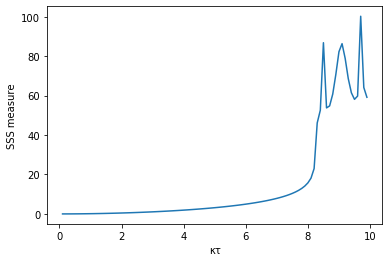

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath 

def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real

def g3(m,c,t):
    meu=cmath.sqrt((2*c/m)**2-1)
    g3=((m/meu)*(meu**2+1)*cmath.sin(meu*m*t))/(cmath.cos(meu*m*t)+cmath.sin(meu*m*t)/meu)
    return g3.real  

def xlind(l,k,m,c,t,rho):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xL2=np.kron(sm,I)@rho@np.kron(sp,I)-0.5*(np.kron(sp,I)@np.kron(sm,I)@rho+rho@np.kron(sp,I)@np.kron(sm,I))
    xL3=np.kron(sz,I)@rho@np.kron(sz,I)-rho
    ld=0.5*g2(l,k,t)*xL2+0.5*g3(m,c,t)*xL3
    return ld

def gksl(r2,r3,rho):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xl2=np.kron(sm,I)@rho@np.kron(sp,I)-0.5*(np.kron(sp,I)@np.kron(sm,I)@rho+rho@np.kron(sp,I)@np.kron(sm,I))
    xl3=np.kron(sz,I)@rho@np.kron(sz,I)-rho
    ld=0.5*r2*xl2+0.5*r3*xl3
    return ld

def integrand(r2,r3,l,k,m,c,t,rho):
    garb=np.zeros((4,4))
    garb=xlind(l,k,m,c,t,rho)-gksl(r2,r3,rho) 
    norm=garb.T@garb
    eg=np.linalg.eig(norm)[0]
    val=abs(np.sqrt(eg[0]))+abs(np.sqrt(eg[1]))+abs(np.sqrt(eg[2]))+abs(np.sqrt(eg[3]))
    return val

def simpsons(r2,r3,l,k,m,c,rho,a,b,n):
    dtt=(b-a)/n
    s=0
    for j in range(n): 
        if j==0 or j==range(n):
            s=s+(dtt/3)*integrand(r2,r3,l,k,m,c,a+j*dtt,rho)
        if j%2==0:
            s=s+(2*dtt/3)*integrand(r2,r3,l,k,m,c,a+j*dtt,rho)
        if j%2!=0:
            s=s+(4*dtt/3)*integrand(r2,r3,l,k,m,c,a+j*dtt,rho)
    return s

rhox=np.array([[1,0,0,1],[0,0,0,0],[0,0,0,0],[1,0,0,1]])
time=1 #actual driving time
k=np.arange(0.1,10,0.1)
l=0.1*k
m,c=1,0.9
r2,r3=0,0
n=200
b=time #upper limit of integration
a=0 #lower limit of integration
dev=np.zeros(len(k))
for i in range(len(k)):
    dev[i]=simpsons(r2,r3,l[i],k[i],m,c,rhox,a,b,n)

plt.plot(k,dev)
plt.xlabel('\u03BA\u03C4')
plt.ylabel('SSS measure')


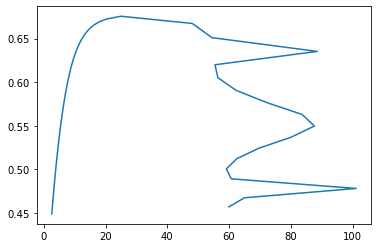

In [6]:
plt.plot(dev,qsl[0,:])

/home/u136094/tmp/ipykernel_3147408/1789358715.py:90: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  fint[j,i]=scint.quad(f,a,b)[0]


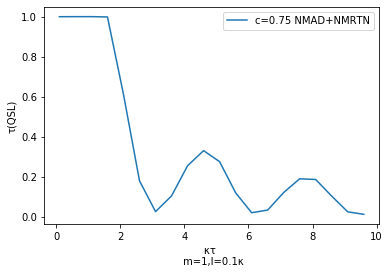

"\nplt.plot(k,revqsl[0,:], label='c=0.75 NMAD+NMRTN')\nplt.plot(k,revqsl[1,:], label='c=0.0.01 NMAD+MRTN')\nplt.xlabel('κτ \n m=1,l=0.1κ')\nplt.ylabel('1/τ(QSL)')\nplt.legend()\nplt.show()"

In [21]:
#time,l,k,m are fixed, m is changing 
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as scint
import cmath
import math

def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real

def g3(m,c,t):
    meu=cmath.sqrt((2*c/m)**2-1)
    g3=((m/meu)*(meu**2+1)*cmath.sin(meu*m*t))/(cmath.cos(meu*m*t)+cmath.sin(meu*m*t)/meu)
    return g3.real    

def tevolve(l,k,m,c,t,rho): #complex stuff here 
    d=cmath.sqrt(l**2-2*k*l)
    meu=cmath.sqrt((2*c/m)**2-1)
    #print(m,c,cmath.sqrt((2*c/m)**2-1))
    rhot=np.zeros((2,2))
    xt=np.exp(-l*t)*(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))**2
    p1t=xt*rho[1,1]+1-xt
    rtnd=np.exp(-m*t)*(cmath.cos(meu*m*t)+cmath.sin(meu*m*t)/meu)
    coh=rho[0,1]*cmath.sqrt(xt)*rtnd
    rhot[0,0]=1-p1t.real
    rhot[1,1]=p1t.real
    rhot[0,1]=coh.real
    rhot[1,0]=coh.real
    return rhot

def lind(l,k,m,c,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((2,2))
    ld=0.5*g2(l,k,t)*(sm@rhot@sp-0.5*(sp@sm@rhot+rhot@sp@sm))+0.5*g3(m,c,t)*(sz@rhot@sz-rhot)
    return ld

def maxvalgen(l,k,m,c,t,rho): #generates the required max value
    rhot=tevolve(l,k,m,c,t,rho)
    norm=lind(l,k,m,c,t,rhot).T@lind(l,k,m,c,t,rhot)
    val=np.linalg.eig(norm)[0]
    fx=np.sqrt(max((val))) #converts into float from complex
    return fx

def simpsons(l,k,m,c,rho,a,b,n):
    dtt=(b-a)/n
    s=0
    for j in range(n): 
        if j==0 or j==range(n):
            s=s+(dtt/3)*maxvalgen(l,k,m,c,a+j*dtt,rho)
        if j%2==0:
            s=s+(2*dtt/3)*maxvalgen(l,k,m,c,a+j*dtt,rho)
        if j%2!=0:
            s=s+(4*dtt/3)*maxvalgen(l,k,m,c,a+j*dtt,rho)
    return s

def bures(l,k,m,c,time,rho): #the Bures angle 
    z1=0
    garb=np.zeros((2,2))
    garb=tevolve(l,k,m,c,time,rho)@rho
    mixpart=np.linalg.det(rho)*np.linalg.det(tevolve(l,k,m,c,time,rho))
    z1=math.acos(abs(np.sqrt(garb.trace())+2*np.sqrt(mixpart)))
    b=np.sin(z1)**2
    return b

time=1 #will give upper limits actual driving time
k=0.1 #k=np.arange(0.1,10,0.1)
l=0.1*k
#l=7*k
m=0.1
#c=[0.9,0.1]
c=np.arange(0.1,10,0.5)
cases=1 #values of c

rho=np.array([[0.5,0.5],[0.5,0.5]])  #time=np.arange(0,300,dt) 
n=200;#no. of points in the smaller integrations

a=0 #lower limit
b=time #upper limit
fint=np.zeros((cases,len(c)))
bur=np.zeros((cases,len(c)))
qsl=np.zeros((cases,len(c)))
revqsl=np.zeros((cases,len(c)))
for j in range(cases):
    for i in range(len(c)):
        f=lambda x:maxvalgen(l,k,m,c[i],x,rho)
        fint[j,i]=scint.quad(f,a,b)[0]
        #fint[j,i]=simpsons(l,k,m,c[i],rho,a,b,n)
        bur[j,i]=bures(l,k,m,c[i],time,rho)
    qsl[j,:]=np.divide(bur[j,:],fint[j,:])
    revqsl[j,:]=np.divide(fint[j,:],bur[j,:])

plt.plot(c,qsl[0,:], label='c=0.75 NMAD+NMRTN')
#plt.plot(k,qsl[1,:], label='c=0.0.01 NMAD+MRTN')
plt.xlabel('\u03BA\u03C4 \n m=1,l=0.1\u03BA')
plt.ylabel('\u03C4(QSL)')
plt.legend()
plt.show()
"""
plt.plot(k,revqsl[0,:], label='c=0.75 NMAD+NMRTN')
plt.plot(k,revqsl[1,:], label='c=0.0.01 NMAD+MRTN')
plt.xlabel('\u03BA\u03C4 \n m=1,l=0.1\u03BA')
plt.ylabel('1/\u03C4(QSL)')
plt.legend()
plt.show()"""


/home/u136094/tmp/ipykernel_3147408/855368447.py:78: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  fint[j,i]=scint.quad(f,a,b)[0]
/home/u136094/tmp/ipykernel_3147408/855368447.py:78: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  fint[j,i]=scint.quad(f,a,b)[0]


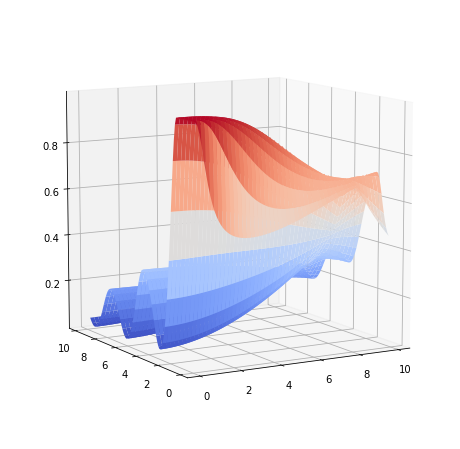

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import scipy.integrate as scint
import cmath
import math
from mpl_toolkits import mplot3d

def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real

def g3(m,c,t):
    meu=cmath.sqrt((2*c/m)**2-1)
    g3=((m/meu)*(meu**2+1)*cmath.sin(meu*m*t))/(cmath.cos(meu*m*t)+cmath.sin(meu*m*t)/meu)
    return g3.real    

def tevolve(l,k,m,c,t,rho): #complex stuff here 
    d=cmath.sqrt(l**2-2*k*l)
    meu=cmath.sqrt((2*c/m)**2-1)
    rhot=np.zeros((2,2))
    xt=np.exp(-l*t)*(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))**2
    p1t=xt*rho[1,1]+1-xt
    rtnd=np.exp(-m*t)*(cmath.cos(meu*m*t)+cmath.sin(meu*m*t)/meu)
    coh=rho[0,1]*cmath.sqrt(xt)*rtnd
    rhot[0,0]=1-p1t.real
    rhot[1,1]=p1t.real
    rhot[0,1]=coh.real
    rhot[1,0]=coh.real
    return rhot

def lind(l,k,m,c,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((2,2))
    ld=0.5*g2(l,k,t)*(sm@rhot@sp-0.5*(sp@sm@rhot+rhot@sp@sm))+0.5*g3(m,c,t)*(sz@rhot@sz-rhot)
    return ld

def maxvalgen(l,k,m,c,t,rho): #generates the required max value
    rhot=tevolve(l,k,m,c,t,rho)
    norm=lind(l,k,m,c,t,rhot).T@lind(l,k,m,c,t,rhot)
    val=np.linalg.eig(norm)[0]
    fx=np.sqrt(max((val))) #converts into float from complex
    return fx

def bures(l,k,m,c,time,rho): #the Bures angle 
    z1=0
    garb=np.zeros((2,2))
    garb=tevolve(l,k,m,c,time,rho)@rho
    mixpart=np.linalg.det(rho)*np.linalg.det(tevolve(l,k,m,c,time,rho))
    z1=math.acos(abs(np.sqrt(garb.trace())+2*np.sqrt(mixpart)))
    b=np.sin(z1)**2
    return b

time=1 #will give upper limits actual driving time
k=np.arange(0.1,10,0.1)
l=0.1*k
#l=7*k
m=0.1
#c=[0.9,0.1]
c=np.arange(0.1,10,0.1)

rho=np.array([[0.5,0.5],[0.5,0.5]])  #time=np.arange(0,300,dt) 
n=200;#no. of points in the smaller integrations

a=0 #lower limit
b=time #upper limit
fint=np.zeros((len(c),len(k)))
bur=np.zeros((len(c),len(k)))
qsl=np.zeros((len(c),len(k)))
cee,kay=np.meshgrid(c,k)
#revqsl=np.zeros((cases,len(k)))
for j in range(len(c)):
    for i in range(len(k)):
        f=lambda x:maxvalgen(l[i],k[i],m,c[j],x,rho)
        fint[j,i]=scint.quad(f,a,b)[0]
        bur[j,i]=bures(l[i],k[i],m,c[j],time,rho)
    qsl[j,:]=np.divide(bur[j,:],fint[j,:])
    #revqsl[j,:]=np.divide(fint[j,:],bur[j,:])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(cee,kay,qsl,cmap=cm.coolwarm)
ax.view_init(10, -120)
plt.show()

In [ ]:
from matplotlib import cm
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(kay,cee,qsl,color='b')
ax.view_init(10, 120)
ax.set_xlabel('c')
ax.set_ylabel('k')
plt.show()
print(qsl)

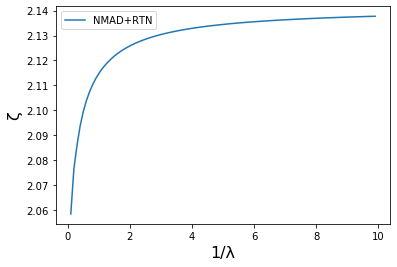

In [7]:
#Deviation from semi-group NMAD+RTN
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import math
import cmath 

def g2(g,x,t): #1/g rates
    d=cmath.sqrt(1-2*g*x)
    intgnd=(2*g*cmath.sinh((0.5*d*t)/x))/(d*cmath.cosh((0.5*d*t)/x)+cmath.sinh((0.5*d*t)/x))
    return abs(intgnd.real)

def g3(go,ge,t):
    o=cmath.sqrt(((2*go)/ge)**2-1)
    intgd=(4*(go**2)*cmath.sin(ge*o*t))/(ge*(o*cmath.cos(ge*o*t)+cmath.sin(g*o*t)))
    return abs(intgd.real)

def lind(g,x,t,go,ge,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xL2=np.kron(sm,I)@rhot@(np.kron(sp,I))-0.5*(np.kron(sp,I)@np.kron(sm,I)@rhot+rhot@(np.kron(sp,I))@np.kron(sm,I))
    xL3=np.kron(sz,I)@rhot@(np.kron(sz,I))-rhot
    ld=g3(go,ge,t)*xL3+g2(g,x,t)*xL2
    return ld

def gksl(r2,r3,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xl2=np.kron(sm,I)@rhot@(np.kron(sp,I))-0.5*(np.kron(sp,I)@np.kron(sm,I)@rhot+rhot@(np.kron(sp,I))@np.kron(sm,I))
    xL3=np.kron(sz,I)@rhot@(np.kron(sz,I))-rhot
    ld=r3*xL3+r2*xl2
    return ld

def integrand(r2,r3,g,x,t,go,ge,rhot):
    garb=np.zeros((4,4))
    garb=lind(g,x,t,go,ge,rhot)-gksl(r2,r3,rhot)
    norm=garb.T@garb
    eg=np.linalg.eig(norm)[0]
    val=abs(np.sqrt(eg[0]))+abs(np.sqrt(eg[1]))+abs(np.sqrt(eg[2]))+abs(np.sqrt(eg[3]))
    return val

rho=np.array([[1,0,0,1],[0,0,0,0],[0,0,0,0],[1,0,0,1]])
time=1
x=np.arange(0.1,10,0.1)
#g=0.3
g=0.3
r2=g
go=0.6
ge=1
k=0.6
o=k*0.25
r3=0.25*k
dev2=np.zeros(len(x))
for i in range(len(x)):
    f=lambda z:integrand(r2,r3,g,x[i],z,go,ge,rho)
    dev2[i]=quad(f,0,time)[0]

plt.plot(x,dev2,label='NMAD+RTN')
plt.xlabel('1/\u03BB',fontsize=16)
plt.ylabel('\u03B6',fontsize=16)
plt.legend()
plt.savefig('nmad_rtn.png',dpi=120)

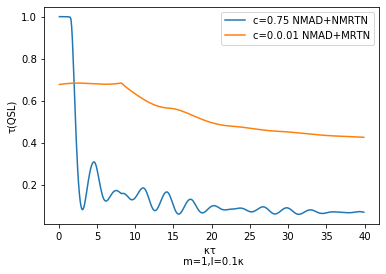

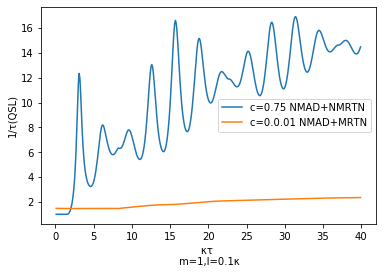

In [1]:
#true combine both 
#time is fixed at t=1, l,k and m are changing 
import matplotlib.pyplot as plt
import numpy as np
import cmath
import scipy.integrate as scint
import math

def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real

def g3(m,c,t):
    meu=cmath.sqrt((2*c/m)**2-1)
    g3=((m/meu)*(meu**2+1)*cmath.sin(meu*m*t))/(cmath.cos(meu*m*t)+cmath.sin(meu*m*t)/meu)
    return g3.real    

def tevolve(l,k,m,c,t,rho): #complex stuff here 
    d=cmath.sqrt(l**2-2*k*l)
    meu=cmath.sqrt((2*c/m)**2-1)
    if meu==0+0j:
        print(c,m)
    rhot=np.zeros((2,2))
    xt=np.exp(-l*t)*(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))**2
    p1t=xt*rho[1,1]+1-xt
    rtnd=np.exp(-m*t)*(cmath.cos(meu*m*t)+cmath.sin(meu*m*t)/meu)
    coh=rho[0,1]*cmath.sqrt(xt)*rtnd
    rhot[0,0]=1-p1t.real
    rhot[1,1]=p1t.real
    rhot[0,1]=coh.real
    rhot[1,0]=coh.real
    return rhot

def lind(l,k,m,c,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((2,2))
    ld=0.5*g2(l,k,t)*(sm@rhot@sp-0.5*(sp@sm@rhot+rhot@sp@sm))+0.5*g3(m,c,t)*(sz@rhot@sz-rhot)
    return ld

def maxvalgen(l,k,m,c,t,rho): #generates the required max value
    rhot=tevolve(l,k,m,c,t,rho)
    norm=lind(l,k,m,c,t,rhot).T@lind(l,k,m,c,t,rhot)
    val=np.linalg.eig(norm)[0]
    fx=np.sqrt(max((val))) #converts into float from complex
    return fx

def bures(l,k,m,c,time,rho): #the Bures angle 
    z1=0
    garb=np.zeros((2,2))
    garb=tevolve(l,k,m,c,time,rho)@rho
    mixpart=np.linalg.det(rho)*np.linalg.det(tevolve(l,k,m,c,time,rho))
    z1=math.acos(abs(np.sqrt(garb.trace())+2*np.sqrt(mixpart)))
    b=np.sin(z1)**2
    return b

time=1 #will give upper limits actual driving time
k=np.arange(0.1,40,0.1)
l=0.1*k
#l=7*k
m=[0.1,90] #non-markov, markov 
c=k #og
#c=[10,0.001] #non-markov, markov 
#m=l
cases=2 #values of m

rho=np.array([[0.5,0.5],[0.5,0.5]])  #time=np.arange(0,300,dt) 
n=200;#no. of points in the smaller integrations

a=0 #lower limit
b=time #upper limit
fint=np.zeros((cases,len(k)))
bur=np.zeros((cases,len(k)))
qsl=np.zeros((cases,len(k)))
revqsl=np.zeros((cases,len(k)))
for j in range(cases):
    for i in range(len(k)):
        f=lambda x:maxvalgen(l[i],k[i],m[j],c[i],x,rho)
        fint[j,i]=scint.quad(f,a,b,limit=150)[0]
        bur[j,i]=bures(l[i],k[i],m[j],c[i],time,rho)
    qsl[j,:]=np.divide(bur[j,:],fint[j,:])
    revqsl[j,:]=np.divide(fint[j,:],bur[j,:])

plt.plot(k,qsl[0,:], label='c=0.75 NMAD+NMRTN')
plt.plot(k,qsl[1,:], label='c=0.0.01 NMAD+MRTN')
plt.xlabel('\u03BA\u03C4 \n m=1,l=0.1\u03BA')
plt.ylabel('\u03C4(QSL)')
plt.legend()
plt.show()

plt.plot(k,revqsl[0,:], label='c=0.75 NMAD+NMRTN')
plt.plot(k,revqsl[1,:], label='c=0.0.01 NMAD+MRTN')
plt.xlabel('\u03BA\u03C4 \n m=1,l=0.1\u03BA')
plt.ylabel('1/\u03C4(QSL)')
plt.legend()
plt.show()


In [53]:
"""print(c/m[0],'\n \n')
print(c/m[1],'\n \n')"""

"print(c/m[0],'\n \n')\nprint(c/m[1],'\n \n')"

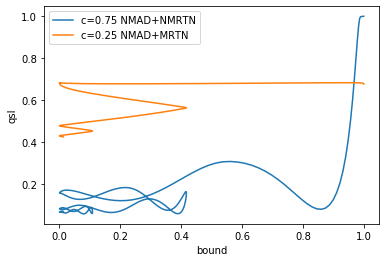

In [2]:
rhot=np.zeros((2,2))
rho=np.array([[0.5,0.5],[0.5,0.5]])
garb=np.zeros((2,2))
Cpar=np.zeros((cases,len(k)))
mix=np.zeros((cases,len(k)))
bound=np.zeros((cases,len(k)))
for j in range(cases):
    for i in range(len(k)):
        rhot=tevolve(l[i],k[i],m[j],c[i],time,rho)
        Cpar[j,i]=abs(rhot[0,1])+abs(rhot[1,0])
        garb=rhot@rhot
        mix[j,i]=2*(1-garb.trace())
        bound[j,i]=Cpar[j,i]**2+mix[j,i]
        i=i+1
    i=0
plt.plot(bound[0,:],qsl[0,:],label='c=0.75 NMAD+NMRTN')
plt.plot(bound[1,:],qsl[1,:],label='c=0.25 NMAD+MRTN')
plt.xlabel('bound')
plt.ylabel('qsl')
plt.legend()
plt.show()

In [12]:
with open('cnmad_rtn_dat.npy', 'wb') as f:
    np.save(f, k)
    np.save(f, qsl)
    np.save(f, revqsl)
    np.save(f, bound)

In [2]:
import numpy as np
with open('cnmad_rtn_dat.npy', 'rb') as f:
    k=np.load(f)
    qsl=np.load(f)
    revqsl=np.load(f)
    bound=np.load(f)


/home/u136094/tmp/ipykernel_2858532/2385923223.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('cad_rtn.png',dpi=120,bbox_inches='tight',pad_inches = 0.1)


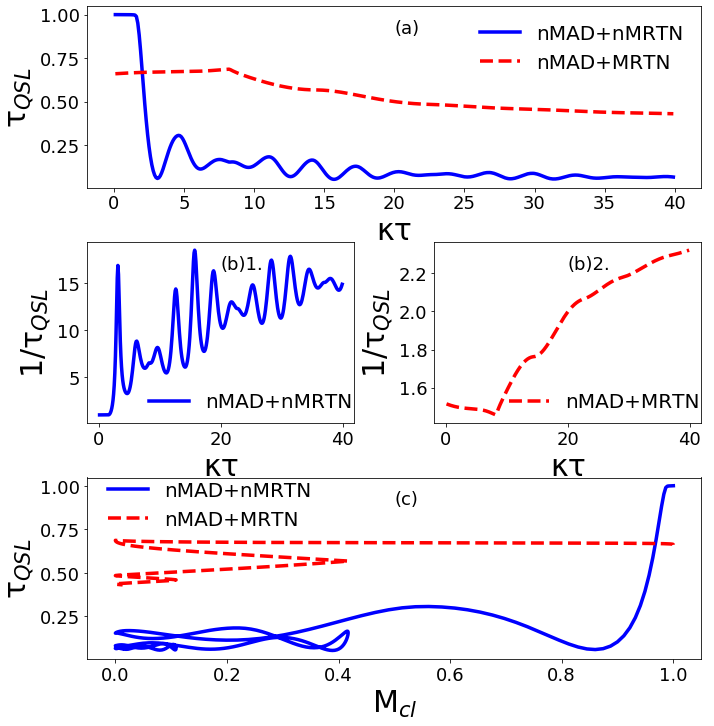

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(tight_layout=True,figsize=(11,12))
plt.rcParams.update({'font.size': 18})
gs = gridspec.GridSpec(3, 2, wspace=0.3, hspace=0.3)
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(k,qsl[0,:],'b',linewidth=3.5, label='nMAD+nMRTN')
ax1.plot(k,qsl[1,:],'r--', linewidth=3.5, label='nMAD+MRTN')
ax1.legend(frameon=False, fontsize=20)
ax1.set_xlabel('\u03BA\u03C4',fontsize=30)
ax1.set_ylabel('\u03C4$_{QSL}$',fontsize=30)
ax1.text(0.5, 0.85, '(a)',transform=ax1.transAxes)

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(k,revqsl[0,:],'b',linewidth=3.5, label='nMAD+nMRTN')
ax2.set_xlabel('\u03BA\u03C4',fontsize=30)
ax2.set_ylabel('1/\u03C4$_{QSL}$',fontsize=30)
ax2.text(0.5, 0.85, '(b)1.',transform=ax2.transAxes)
ax2.legend(loc=(0.2,0.02),frameon=False,fontsize=20) 

ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(k,revqsl[1,:],'r--',linewidth=3.5, label='nMAD+MRTN')
ax2.set_xlabel('\u03BA\u03C4',fontsize=30)
ax2.set_ylabel('1/\u03C4$_{QSL}$',fontsize=30)
ax2.text(0.5, 0.85, '(b)2.',transform=ax2.transAxes)
ax2.legend(loc=(0.25,0.02),frameon=False,fontsize=20) 

ax3 = fig.add_subplot(gs[2, :])
ax3.plot(bound[0,:],qsl[0,:],'b',linewidth=3.5,label='nMAD+nMRTN')
ax3.plot(bound[1,:],qsl[1,:],'r--',linewidth=3.5,label='nMAD+MRTN')
ax3.set_xlabel('M$_{cl}$',fontsize=30)
ax3.set_ylabel('\u03C4$_{QSL}$',fontsize=30)
ax3.text(0.5, 0.85, '(c)',transform=ax3.transAxes)
ax3.legend(loc=(0.02,0.67),frameon=False,fontsize=20)
fig.savefig('cad_rtn.png',dpi=120,bbox_inches='tight',pad_inches = 0.1)

Text(0.45, 0.85, '(c)')

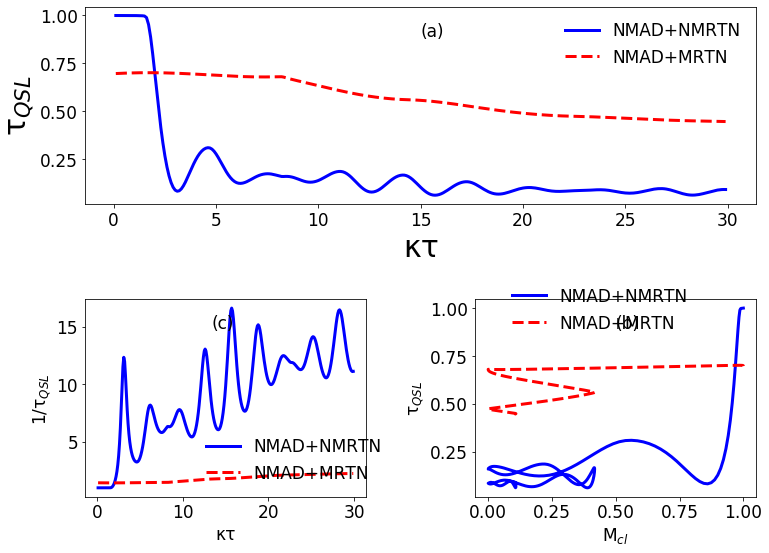

In [43]:
import matplotlib.gridspec as gridspec
fig = plt.figure(tight_layout=True,figsize=(11,8))
plt.rcParams.update({'font.size': 17})
gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(k,qsl[0,:],'b',linewidth=3, label='NMAD+NMRTN')
ax1.plot(k,qsl[1,:],'r--', linewidth=3, label='NMAD+MRTN')
ax1.legend(frameon=False)
ax1.set_xlabel('\u03BA\u03C4',fontsize=30)
ax1.set_ylabel('\u03C4$_{QSL}$',fontsize=30)
ax1.text(0.5, 0.85, '(a)',transform=ax1.transAxes)

ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(bound[0,:],qsl[0,:],'b',linewidth=3,label='NMAD+NMRTN')
ax2.plot(bound[1,:],qsl[1,:],'r--',linewidth=3,label='NMAD+MRTN')
ax2.set(xlabel='M$_{cl}$', ylabel='\u03C4$_{QSL}$')
ax2.text(0.5, 0.85, '(b)',transform=ax2.transAxes)
ax2.legend(loc=(0.105,0.8),frameon=False)

ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(k,revqsl[0,:],'b',linewidth=3, label='NMAD+NMRTN')
ax3.plot(k,revqsl[1,:],'r--',linewidth=3, label='NMAD+MRTN')
ax3.legend(loc=(0.405,0.04),frameon=False)
ax3.set(xlabel='\u03BA\u03C4', ylabel='1/\u03C4$_{QSL}$')
ax3.text(0.45, 0.85, '(c)',transform=ax3.transAxes)
#fig.savefig('ad_rtn.eps',dpi=120,bbox_inches='tight',pad_inches = 0.1)